# Gaussian Processes Classification With Scikit-Learn

# Loading Scikit-Learn Library

In [76]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF,  RationalQuadratic
from sklearn.datasets import load_diabetes, load_breast_cancer

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

# Loading Breast Cancer Dataset from Scikit-Learn

In [77]:
X, y  = load_breast_cancer(return_X_y = True)


# Shape of the Dataset

In [78]:
X.shape, y.shape

((569, 30), (569,))

# Plotting the Dataset

--2022-07-31 11:50:31--  https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/dev/gaussian-processes/gaussian_processes_util.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3842 (3.8K) [text/plain]
Saving to: ‘gaussian_processes_util.py.1’

gaussian_processes_ 100%[===================>]   3.75K  --.-KB/s    in 0s      

2022-07-31 11:50:31 (39.3 MB/s) - ‘gaussian_processes_util.py.1’ saved [3842/3842]



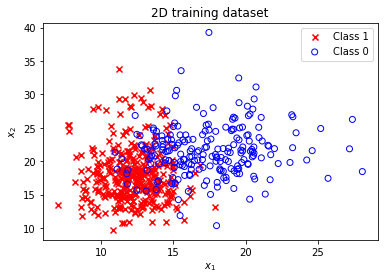

In [83]:
try:
    # Check if notebook is running in Google Colab
    import google.colab
    # Get additional files from Github
    !wget https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/dev/gaussian-processes/gaussian_processes_util.py
except:
    pass

from gaussian_processes_util import (
    plot_data_1D,
    plot_data_2D,
    plot_pt_2D,
    plot_db_2D)

%matplotlib inline
import matplotlib.pyplot as plt

plot_data_2D(X, y)
plt.title('2D training dataset')
plt.legend();

# Splitting up the dataset-> train:test=80:20

In [84]:
split = -1*int(X.shape[0]*0.2)
X= X[:split, :]
y = y[:split]
X_test= X[:split, :]
y_test = y[:split]


# Defining the model using RationalQuadratic Kernel

In [85]:

model = GaussianProcessClassifier(kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1))

# Fitting the model

In [86]:
# fit model
model.fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpc.py:472: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


GaussianProcessClassifier(kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1))

# Make a prediction

In [87]:

yhat = model.predict(X_test)


In [88]:
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

# Precision, Recall, Fscore, Accuracy as Output:

In [114]:
precision, recall, fscore, _ = score(y_test, yhat)
accuracy = accuracy_score(y_test, yhat)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

print('accuracy: {}'.format(accuracy))

precision: [0.97385621 0.95789474]
recall: [0.94904459 0.97849462]
fscore: [0.96129032 0.96808511]
accuracy: 0.9650145772594753


# Tuning Hyperparameter such as Kernel, can give different result. E.g. if we choose WhiteKernel, it gives the worst result.

In [73]:
from sklearn.gaussian_process.kernels import WhiteKernel
model = GaussianProcessClassifier(1*WhiteKernel())


In [74]:
model.fit(X, y)

GaussianProcessClassifier(kernel=1**2 * WhiteKernel(noise_level=1))

In [75]:
yhat = model.predict(X_test)
precision, recall, fscore, _ = score(y_test, yhat)
accuracy = accuracy_score(y_test, yhat)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

print('accuracy: {}'.format(accuracy))

precision: [0.45772595 0.        ]
recall: [1. 0.]
fscore: [0.628 0.   ]
accuracy: 0.4577259475218659


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
